# Visualização de Dados

## Importando bibliotecas e DataFrames

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%store -r df
%store -r ages
%store -r cases

#### 1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual;

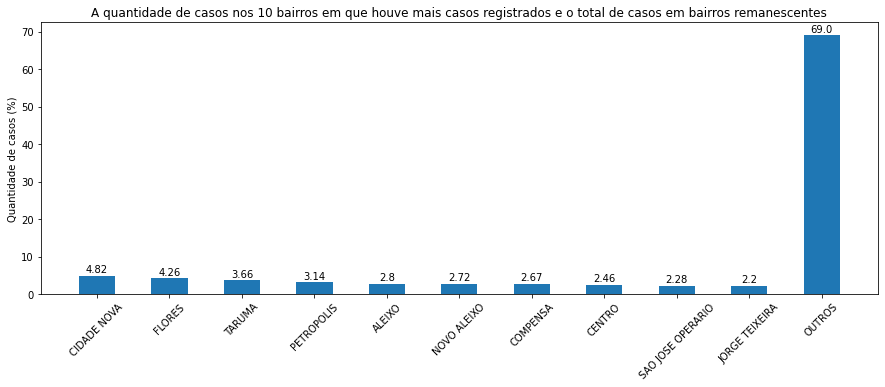

In [9]:
neighborhoods = df[df['_classificacao'].isin(['Confirmado'])].groupby(by='_bairro').size().sort_values(ascending=False).head(10)
others = df[df['_classificacao'].isin(['Confirmado'])].groupby(by='_bairro').size().sort_values(ascending=True).head(403).sum()

names = [neighborhood for neighborhood in neighborhoods.index]
names.append('OUTROS')
values = [round((neighborhood/6145)*100, 2) for neighborhood in neighborhoods]
values.append(round((others/6145)*100, 2))

x = np.arange(len(names))
width = 0.5

fig, ax = plt.subplots(figsize=(15,5))
rects = ax.bar(x - width/2, values, width, align= 'edge')

ax.set_ylabel('Quantidade de casos (%)')
ax.set_title("A quantidade de casos nos 10 bairros em que houve mais casos registrados e o total de casos em bairros remanescentes")
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(names)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1.5),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        
autolabel(rects)        
plt.show()

#### 2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

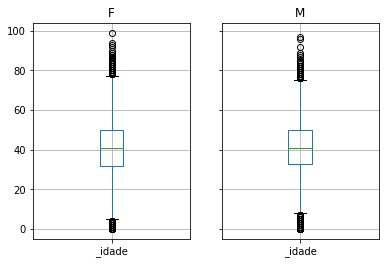

In [4]:
df.groupby('_sexo').boxplot(column=['_idade'])
plt.show()

#### 3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados

In [5]:
df_cases = pd.to_datetime(df['_dt_notificacao'], format="%d/%m/%Y")
array_dates = np.sort(df_cases.dropna().dt.strftime("%m/%d/%Y"))
unique_elements, counts_elements = np.unique(array_dates, return_counts=True)
result = np.asarray((unique_elements[::-1], counts_elements[::-1]))
last_ten_days_dates = result[0][:10][::-1]
last_ten_days_values = result[1][:10][::-1]

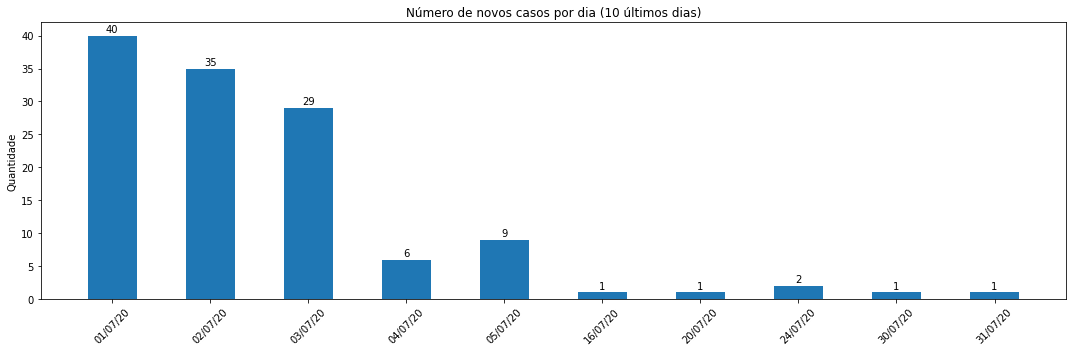

In [6]:
labels = pd.to_datetime(last_ten_days_dates).strftime("%d/%m/%y")
values = last_ten_days_values

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(15,5))
rects = ax.bar(x - width/2, values, width, align= 'edge')

ax.set_ylabel('Quantidade')
ax.set_title("Número de novos casos por dia (10 últimos dias)")
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(labels)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1.5),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)
fig.tight_layout()

plt.show()

#### 4. Repita o gráfico anterior considerando o número de casos recuperado;

In [10]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'], format="%d/%m/%Y")
df_cases_recovered = df[df['_conclusao'].isin(['Recuperado'])]
array_dates = np.sort(df_cases_recovered['_dt_notificacao'].dropna().dt.strftime("%m/%d/%Y"))
unique_elements, counts_elements = np.unique(array_dates, return_counts=True)
result = np.asarray((unique_elements[::-1], counts_elements[::-1]))
recovered_days_dates = result[0][:10][::-1]
recovered_days_values = result[1][:10][::-1]

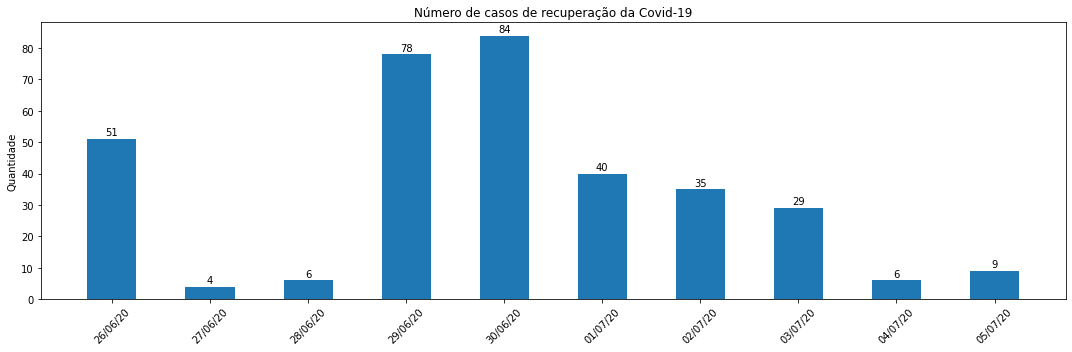

In [11]:
labels = pd.to_datetime(recovered_days_dates).strftime("%d/%m/%y")
values = recovered_days_values

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(15, 5))
rects = ax.bar(x - width/2, values, width, align='edge')

ax.set_ylabel('Quantidade')
ax.set_title("Número de casos de recuperação da Covid-19")
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(labels)

autolabel(rects)
fig.tight_layout()

plt.show()

#### 5.Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.);

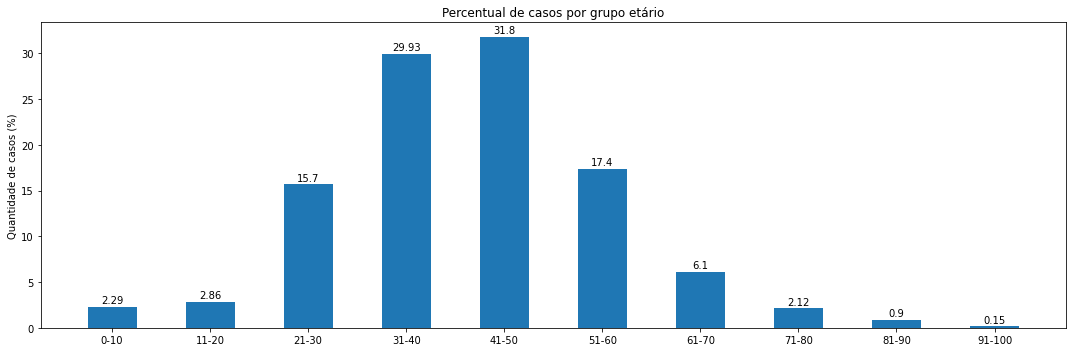

In [12]:
ages_=[]
cases_=[]
total_=0

decade_prev=-1
decade_aft=10
#calculo de casos por fixa etaria
for key in range(len(ages)):

    if (ages[int(key)]>decade_aft):
        ages_.append((str(decade_prev+1)+'-'+str(decade_aft)))
        cases_.append(round(((total_/6145)*100),2)) # 2 casas decimais
        total_=0
        decade_prev=decade_aft
        decade_aft+=10
        total_+=cases[int(key)]

    if((decade_prev)<ages[int(key)]<=decade_aft):
        total_+=cases[int(key)]
        if(key==(len(ages)-1)):
            ages_.append((str(decade_prev+1)+'-'+str(decade_aft)))
            cases_.append(round(((total_/6145)*100),2)) # 2 casas demais

labels = ages_
values = cases_

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(15,5))
rects = ax.bar(x - width/2, values, width, align= 'edge')

ax.set_ylabel('Quantidade de casos (%)')
ax.set_title("Percentual de casos por grupo etário")
ax.set_xticks(x)
plt.xticks(rotation=0)
ax.set_xticklabels(labels)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1.5),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)
fig.tight_layout()

plt.show()

        

#### 6.Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;

In [13]:
array_month = df['_dt_notificacao'].dt.strftime('%m/%Y')
unique_elements, counts_elements = np.unique(array_month, return_counts=True)

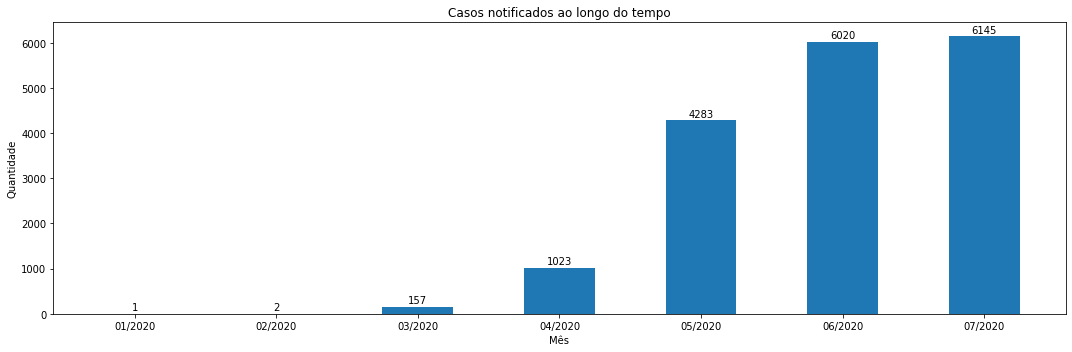

In [14]:
labels = unique_elements
values = []

values.append(counts_elements[0])
for i in range(len(counts_elements)-1):
    values.append(values[i] + counts_elements[i+1])

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(15,5))
rects = ax.bar(x - width/2, values, width, align= 'edge')

ax.set_ylabel('Quantidade')
ax.set_xlabel('Mês')

ax.set_title("Casos notificados ao longo do tempo")
ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(rects)
fig.tight_layout()

plt.show()

#### 7.Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?

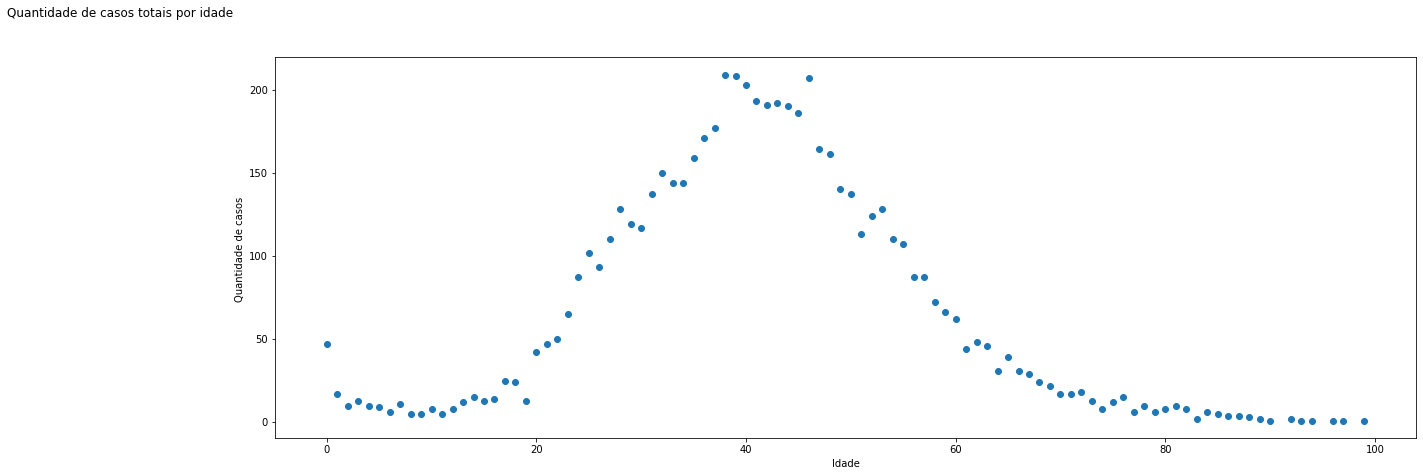

Observa-se uma tendência onde a idade e nº de casos são proporcionais até um pico enquadrado na faixa etária próxima dos 35-55 anos, em seguida as variáveis se tornam inversamente proporcionais.


In [16]:
#variáveis importados da análise realizada na questão 2.1.8 :"ages"e "cases"
plt.figure(figsize=(45, 7))

plt.subplot(122)

plt.ylabel('Quantidade de casos ')
plt.xlabel('Idade')
plt.scatter( ages,cases)
plt.suptitle('Quantidade de casos totais por idade')

plt.show()
print("Observa-se uma tendência onde a idade e nº de casos são proporcionais até um pico enquadrado na faixa etária próxima dos 35-55 anos, em seguida as variáveis se tornam inversamente proporcionais.")